In [444]:
import numpy as np
from scipy import linalg as lin
from scipy.sparse import linalg as slin
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import animation

# A, B, C

In [626]:
def m_square(N):

    # Since only the interior mesh points are considered, N-2
    N = N-2
    N2 = N**2

    # Generate the M matrix
    M = np.diag(4*np.ones(N2))

    # Nodes value 1
    for i in range(N2):
        left = i-1
        right = i+1
        up = i+N
        bottom = i-N
        nodes = np.array(([i, i, i, i], [left, right, up, bottom]))

        if i+1 <= N:
            nodes = np.delete(nodes, 3, 1)
        if i+1 > N2 - N:
            nodes = np.delete(nodes, 2, 1)
        if (i+1) % N == 0:
            nodes = np.delete(nodes, 1, 1)          
        if (i+1) % N == 1:
            nodes = np.delete(nodes, 0, 1)
        
        M[tuple(nodes)] = -1
    
    return M

In [899]:
N = 50
M = m_square(N)

In [628]:
%%time
w, v = lin.eig(M)

Wall time: 7.53 s


In [633]:
%%time
w, v = lin.eigh(M)

Wall time: 2.69 s


In [900]:
%%time
w, v = slin.eigs(M, k=4, which='SM')

Wall time: 1.82 s


In [916]:
%%time
ws, vs = slin.eigsh(M, k=4, which='SM')

Wall time: 2.02 s


C:\Users\wangk\AppData\Local\Temp/ipykernel_14812/1713032375.py:6: ComplexWarning: Casting complex values to real discards the imaginary part
  As[1:-1, 1:-1] = v1


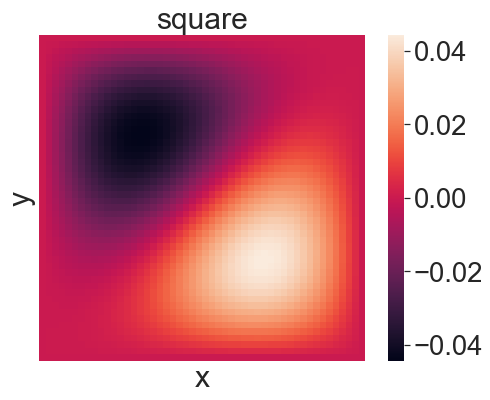

In [904]:
As = np.zeros((N,N))

plt.rcParams['figure.figsize'] = (8,6)

v1 = np.reshape(v[:,2], ((N-2, N-2)))
As[1:-1, 1:-1] = v1
sns.heatmap(As, xticklabels=False, yticklabels=False, square=True)
plt.xlabel('x')
plt.ylabel('y')
plt.title('square')

sns.set(font_scale=1.7)

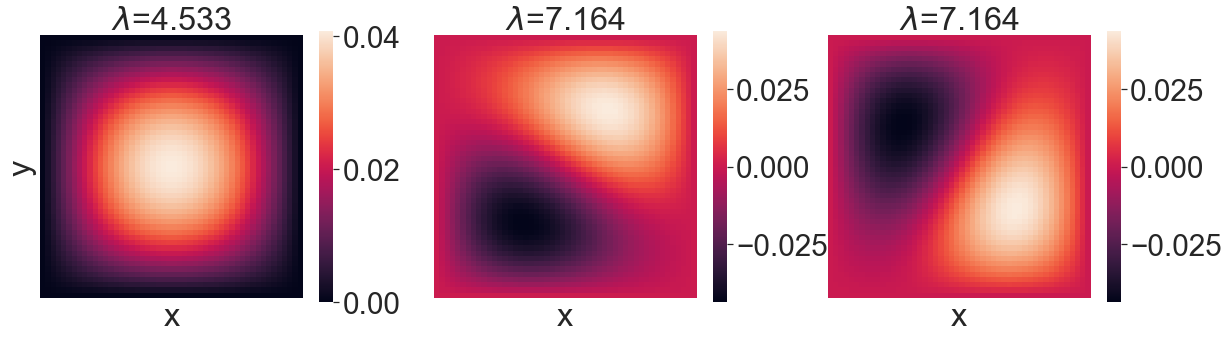

In [921]:
fig1, ax1 = plt.subplots(ncols=3)

plt.rcParams['figure.figsize'] = (20, 5)

As[1:-1, 1:-1] = np.reshape(vs[:,0], ((N-2, N-2)))
sns.heatmap(As, xticklabels=False, yticklabels=False, square=True, ax=ax1[0])
ax1[0].set(xlabel='x', ylabel='y', title=r'$\lambda$=%1.3f' % (np.sqrt(ws[0])/0.02) )
As[1:-1, 1:-1] = np.reshape(vs[:,1], ((N-2, N-2)))
sns.heatmap(As, xticklabels=False, yticklabels=False, square=True, ax=ax1[1])
ax1[1].set(xlabel='x', title=r'$\lambda$=%1.3f' % (np.sqrt(ws[1])/0.02))
As[1:-1, 1:-1] = np.reshape(vs[:,2], ((N-2, N-2)))
sns.heatmap(As, xticklabels=False, yticklabels=False, square=True, ax=ax1[2])
ax1[2].set(xlabel='x', title=r'$\lambda$=%1.3f' % (np.sqrt(ws[2])/0.02))

sns.set(font_scale=2.7)

plt.show()

In [38]:
def m_rectangle(x, y):

    # Since only the interior mesh points are considered, L-2
    L = min(x, y) - 2
    L2 = max(x, y) - 2

    La = L*L2

    # Generate the M matrix
    M = np.diag(4*np.ones(La))

    # Nodes value 1
    for i in range(La):
        left = i-1
        right = i+1
        up = i+L2
        bottom = i-L2
        nodes = np.array(([i, i, i, i], [left, right, up, bottom]))

        if i+1 <= L2:
            # botoom boundary nodes
            nodes = np.delete(nodes, 3, 1)
        if i+1 > La - L2:
            # up boundary nodes
            nodes = np.delete(nodes, 2, 1)
        if (i+1) % L2 == 0:
            # right boundary nodes
            nodes = np.delete(nodes, 1, 1)          
        if (i+1) % L2 == 1:
            # left boundary nodes
            nodes = np.delete(nodes, 0, 1)
        
        M[tuple(nodes)] = -1
    
    return M

In [913]:
L = 50
M_rec = m_rectangle(x=L, y=L*2)

In [683]:
%%time
w, v = lin.eig(M_rec)

Wall time: 55.6 s


In [684]:
%%time
w, v = lin.eigh(M_rec)

Wall time: 15.3 s


In [910]:
%%time
w, v = slin.eigs(M_rec, k=3, which='SM')

Wall time: 12.2 s


In [922]:
%%time
wr, vr = slin.eigsh(M_rec, k=3, which='SM')

Wall time: 13.6 s


In [911]:
Ar = np.zeros((L,L*2))

plt.rcParams['figure.figsize'] = (8,6)

v1 = np.reshape(v[:,1], ((L-2, L*2-2)))
Ar[1:-1, 1:-1] = v1
sns.heatmap(Ar, xticklabels=False, yticklabels=False, square=True)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Rectanguler')

sns.set(font_scale=1.7)

TypeError: only integer scalar arrays can be converted to a scalar index

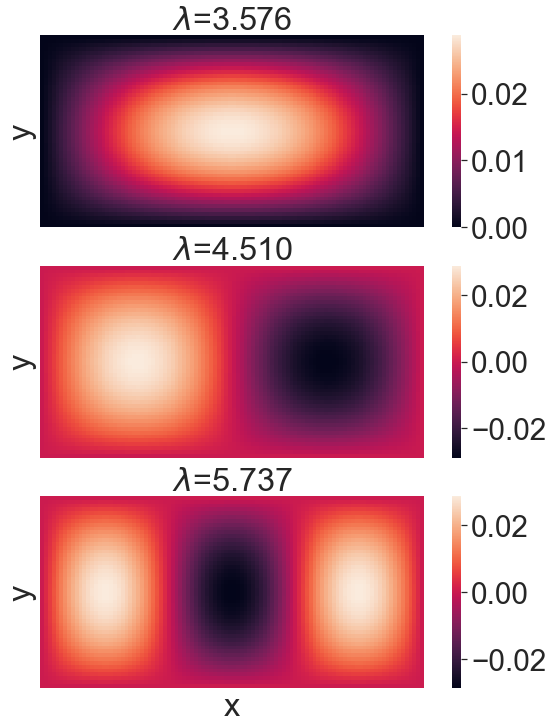

In [926]:
fig2, ax2 = plt.subplots(nrows=3)

plt.rcParams['figure.figsize'] = (10, 12)

Ar[1:-1, 1:-1] = np.reshape(vr[:,0], ((L-2, L*2-2)))
sns.heatmap(Ar, xticklabels=False, yticklabels=False, square=True, ax=ax2[0])
ax2[0].set(ylabel='y', title=r'$\lambda$=%1.3f' % (np.sqrt(wr[0])/0.02) )
Ar[1:-1, 1:-1] = np.reshape(vr[:,1], ((L-2, L*2-2)))
sns.heatmap(Ar, xticklabels=False, yticklabels=False, square=True, ax=ax2[1])
ax2[1].set(ylabel='y', title=r'$\lambda$=%1.3f' % (np.sqrt(wr[1])/0.02))
Ar[1:-1, 1:-1] = np.reshape(vr[:,2], ((L-2, L*2-2)))
sns.heatmap(Ar, xticklabels=False, yticklabels=False, square=True, ax=ax2[2])
ax2[2].set(xlabel='x', ylabel='y', title=r'$\lambda$=%1.3f' % (np.sqrt(wr[2])/0.02))

sns.set(font_scale=2.7)

plt.show()

In [692]:
 # construct the circular domain based on the square domain
def m_circle(M, N):

    N = N - 2

    # index matrix
    ind_m = np.arange(N**2).reshape((N, N))

    # construct the circular domain based on the square domain
    ci, cj = (N-1)/2, (N-1)/2
    cr = N/2

    # Create index arrays
    I, J = np.meshgrid(range(N), range(N))

    # calculate the distances of all points to center
    dist=np.sqrt((I-ci)**2+(J-cj)**2)

    # find the out domain indices
    mask_ind = ind_m[dist>cr]

    M[tuple(mask_ind), :] = 0

    return M

In [929]:
M_c = m_square(50)
M_c = m_circle(M_c, N=50)

In [930]:
%%time
wc, vc = lin.eig(M_c)

Wall time: 5.89 s


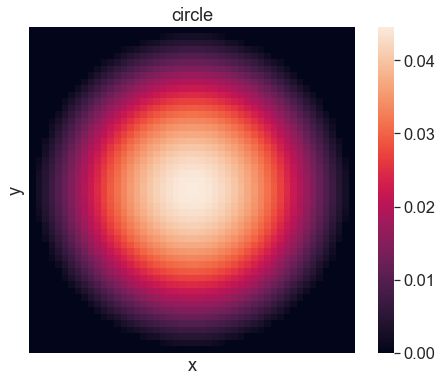

In [824]:
Ac = np.zeros((50,50))

plt.rcParams['figure.figsize'] = (8,6)

w_order = set([i for i in w if i > 0])

vm = vc[:, np.where(w==sorted(w_order)[0])].real

v1 = np.reshape(vm, ((48, 48)))
Ac[1:-1, 1:-1] = v1
sns.heatmap(Ac, xticklabels=False, yticklabels=False, square=True)
plt.xlabel('x')
plt.ylabel('y')
plt.title('circle')

sns.set(font_scale=1.7)

C:\Users\wangk\AppData\Local\Temp/ipykernel_14812/3155005812.py:9: ComplexWarning: Casting complex values to real discards the imaginary part
  ax3[0].set(xlabel='x', ylabel='y', title=r'$\lambda$=%1.3f' % (np.sqrt(sorted(w_order)[0])/0.02))
C:\Users\wangk\AppData\Local\Temp/ipykernel_14812/3155005812.py:13: ComplexWarning: Casting complex values to real discards the imaginary part
  ax3[1].set(xlabel='x', title=r'$\lambda$=%1.3f' % (np.sqrt(sorted(w_order)[1])/0.02))
C:\Users\wangk\AppData\Local\Temp/ipykernel_14812/3155005812.py:17: ComplexWarning: Casting complex values to real discards the imaginary part
  ax3[2].set(xlabel='x', title=r'$\lambda$=%1.3f' % (np.sqrt(sorted(w_order)[2])/0.02))


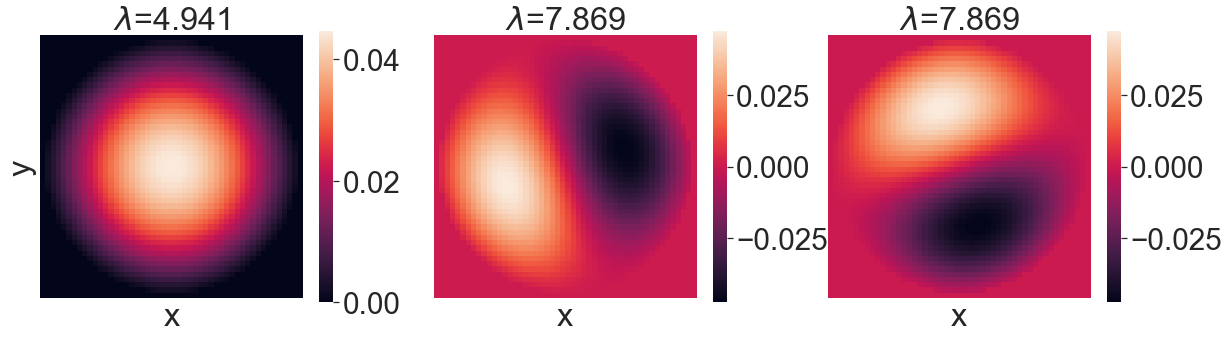

In [933]:
fig3, ax3 = plt.subplots(ncols=3)

plt.rcParams['figure.figsize'] = (20, 5)

w_order = set([i for i in wc if i > 0])

Ac[1:-1, 1:-1] = np.reshape(vc[:, np.where(wc==sorted(w_order)[0])].real, ((48, 48)))
sns.heatmap(Ac, xticklabels=False, yticklabels=False, square=True, ax=ax3[0])
ax3[0].set(xlabel='x', ylabel='y', title=r'$\lambda$=%1.3f' % (np.sqrt(sorted(w_order)[0])/0.02))

Ac[1:-1, 1:-1] = np.reshape(vc[:, np.where(wc==sorted(w_order)[1])].real, ((48, 48)))
sns.heatmap(Ac, xticklabels=False, yticklabels=False, square=True, ax=ax3[1])
ax3[1].set(xlabel='x', title=r'$\lambda$=%1.3f' % (np.sqrt(sorted(w_order)[1])/0.02))

Ac[1:-1, 1:-1] = np.reshape(vc[:, np.where(wc==sorted(w_order)[2])].real, ((48, 48)))
sns.heatmap(Ac, xticklabels=False, yticklabels=False, square=True, ax=ax3[2])
ax3[2].set(xlabel='x', title=r'$\lambda$=%1.3f' % (np.sqrt(sorted(w_order)[2])/0.02))

sns.set(font_scale=2.7)

plt.show()

# D

### Square

In [934]:
# Assume the discretizing step is 0.02
dx = 0.02

L = np.arange(0, 50)*dx + 0.5
N = L / dx
N = N.astype(int)

ws_f = []

for i in range(len(N)):
    M = m_square(N[i])
    w, v = slin.eigsh(M, k=5, which='SM')
    ws_f.append(w)

### Rectanguler

In [935]:
# Assume the discretizing step is 0.02
dx = 0.02

L = np.arange(0, 50)*dx + 0.5
N = L / dx
N = N.astype(int)

wr_f = []

for i in range(len(N)):
    M = m_rectangle(N[i], N[i]*2)
    w, v = slin.eigsh(M, k=3, which='SM')
    wr_f.append(w)
    print(i, end=',')

0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,

### Circle

In [936]:
# Assume the discretizing step is 0.02
dx = 0.02

L = np.arange(0, 50)*dx + 0.5
N = L / dx
N = N.astype(int)

wc_f = []

for i in range(len(N)):
    
    M = m_square(N[i])
    M = m_circle(M, N=N[i])

    w, v = lin.eig(M)

    w_order = set([i.real for i in w if i > 0])

    wc_f.append(sorted(w_order)[0:3])
    print(i, end=',')

0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,

In [333]:
wc[0][2]

0.10216890430234776

[25 26 27 28 28 30 31 32 33 33 35 36 37 38 39 40 41 42 43 44 45 45 46 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 66 67 69 70 71 72
 73 74]
[14.599539776500306, 14.018226984339243, 13.481340526055593, 12.983984688498658, 12.983984688498644, 12.091626676248653, 11.689846854839717, 11.313870989986176, 10.961293930137275, 10.961293930137206, 10.318120958067924, 10.024000550212314, 9.746165629632664, 9.483301405566731, 9.234230772134705, 8.997896761987645, 8.7733476141478, 8.559724013048193, 8.356248139473717, 8.16221424043084, 7.976980477854707, 7.976980477854359, 7.799961858434261, 7.468478165619582, 7.313075750867748, 7.164004964549524, 7.020886787739442, 6.883371844895739, 6.751137562895871, 6.623885650493263, 6.5013398568253065, 6.383243973605469, 6.269360050651968, 6.159466798650435, 6.053358156642046, 5.950842004750509, 5.851739005267059, 5.7558815574083875, 5.66311285295135, 5.573286021583767, 5.486263356160908, 5.401915609311604, 5.401915609311823, 5.3201213538355026

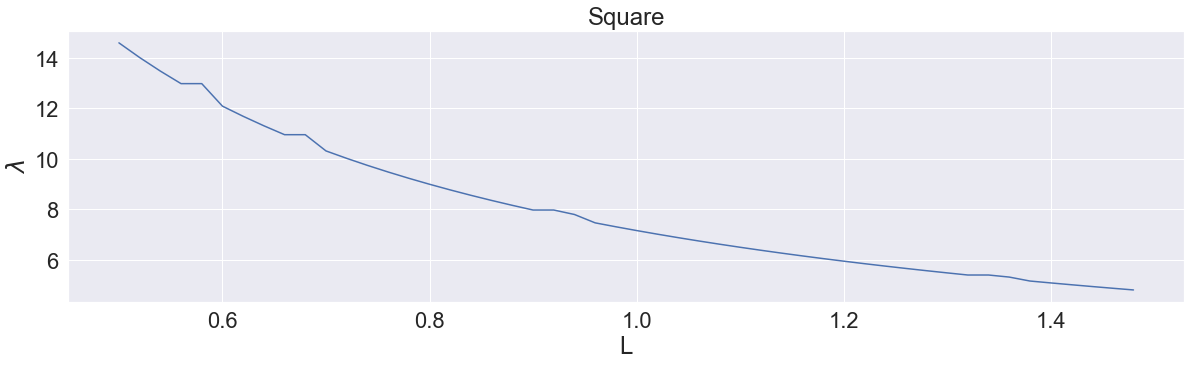

In [839]:
lamda_plot = [np.sqrt(ws[i][2]) / dx for i in range(len(ws))]

sns.lineplot(x=L, y=lamda_plot)
plt.xlabel('L')
plt.ylabel(r'$\lambda$')
plt.title('Square')
sns.set(font_scale=2)
plt.show()

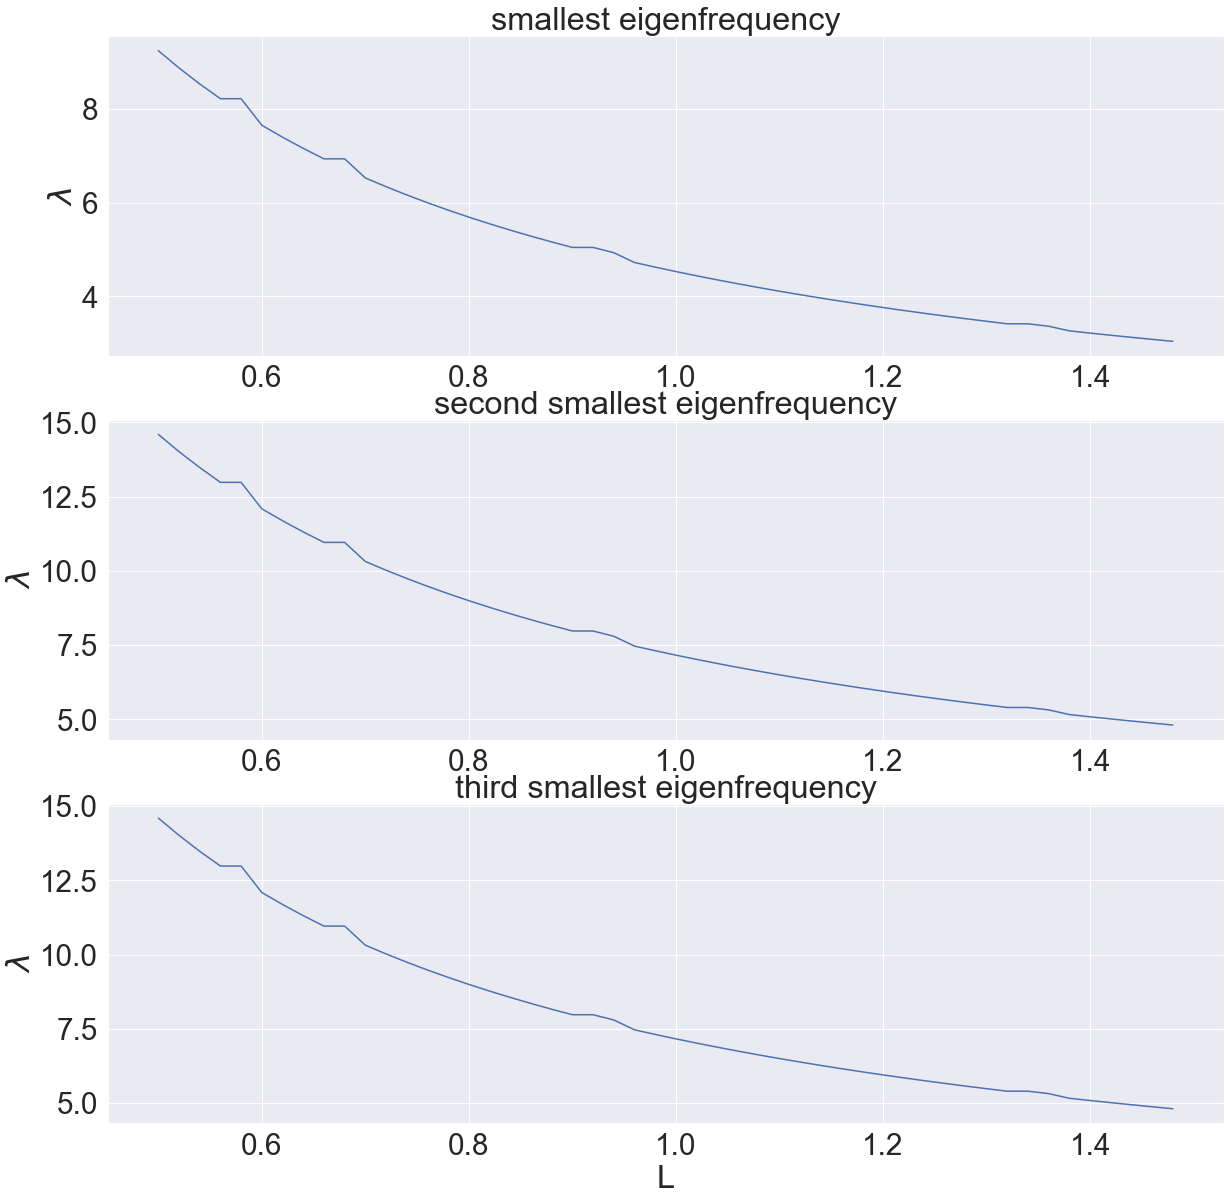

In [940]:
fig4, ax4 = plt.subplots(nrows=3)

plt.rcParams['figure.figsize'] = (20, 20)

sns.lineplot(x=L, y=[np.sqrt(ws_f[i][0]) / dx for i in range(len(ws_f))], ax=ax4[0])
ax4[0].set( ylabel=r'$\lambda$', title='smallest eigenfrequency')
sns.lineplot(x=L, y=[np.sqrt(ws_f[i][1]) / dx for i in range(len(ws_f))], ax=ax4[1])
ax4[1].set( ylabel=r'$\lambda$', title='second smallest eigenfrequency')
sns.lineplot(x=L, y=[np.sqrt(ws_f[i][2]) / dx for i in range(len(ws_f))], ax=ax4[2])
ax4[2].set(xlabel='L', ylabel=r'$\lambda$', title='third smallest eigenfrequency')

plt.show()

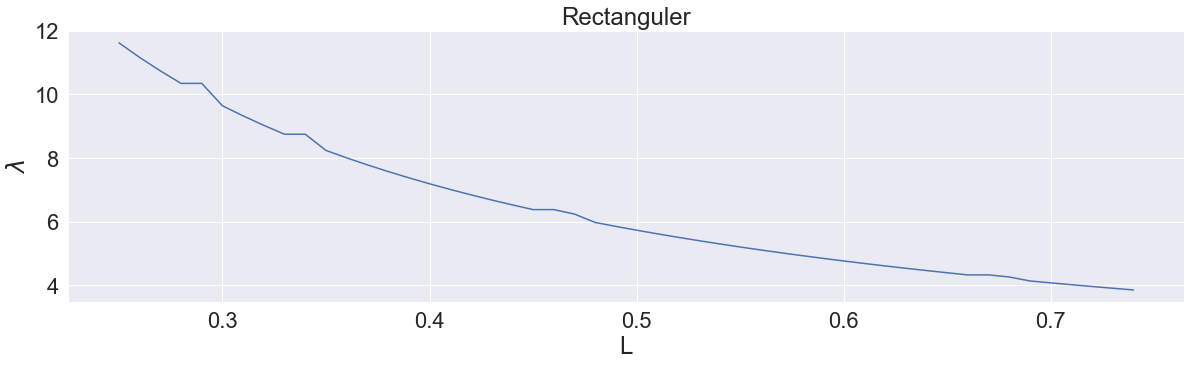

In [840]:
lamda_plot = [np.sqrt(wr[i][2]) / dx for i in range(len(wr))]
sns.lineplot(x=L/2, y=lamda_plot)
plt.xlabel('L')
plt.ylabel(r'$\lambda$')
plt.title('Rectanguler')
sns.set(font_scale=2)
plt.show()

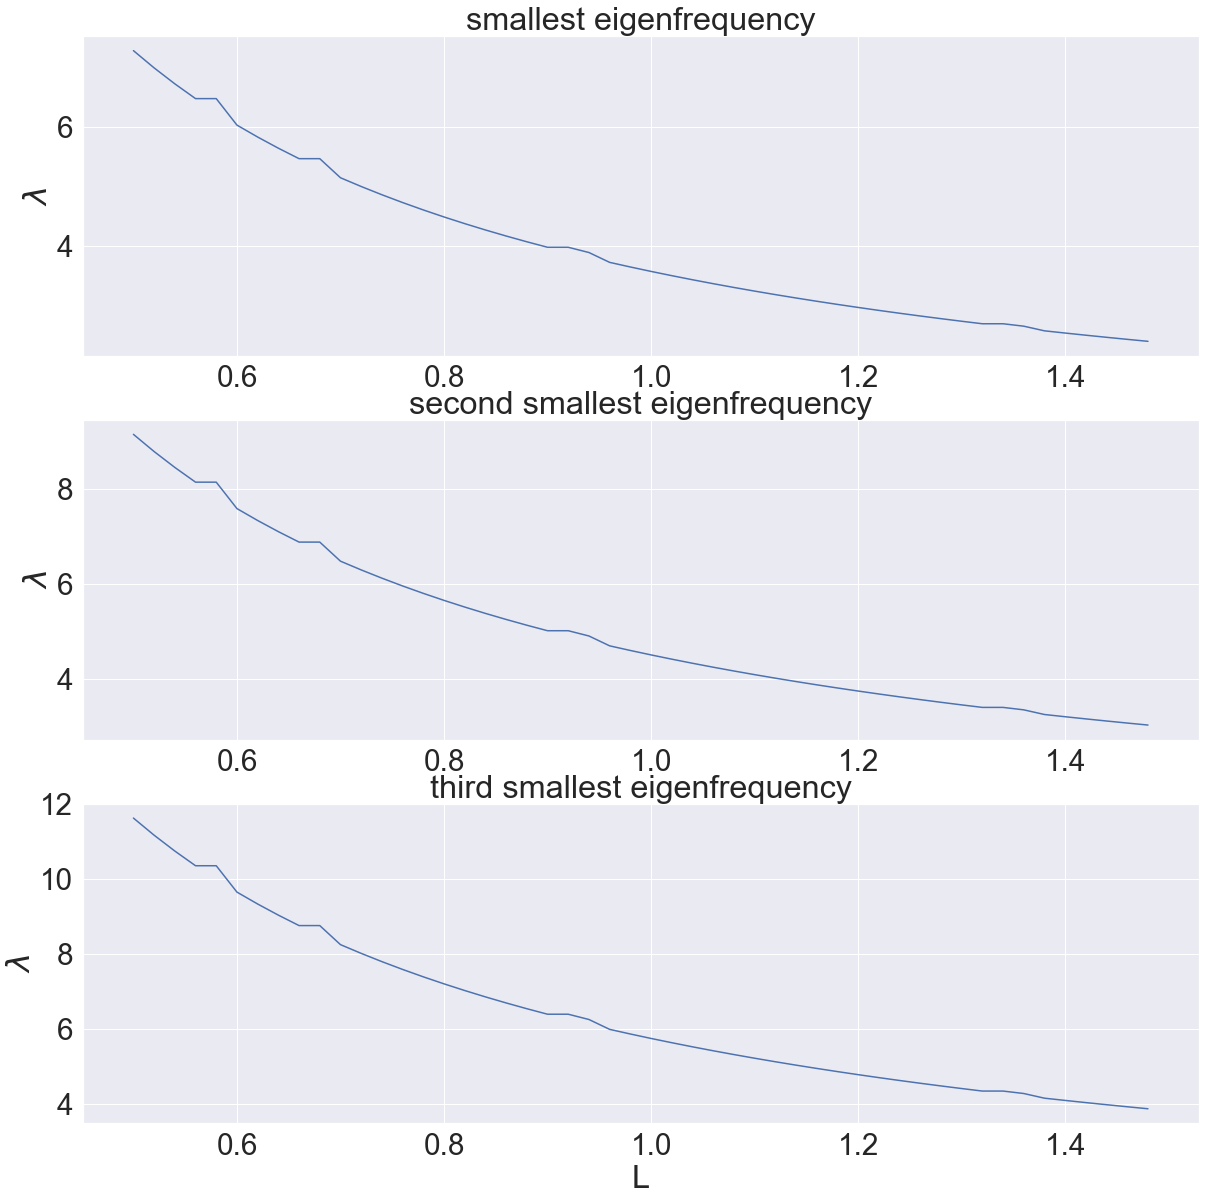

In [942]:
fig5, ax5 = plt.subplots(nrows=3)

plt.rcParams['figure.figsize'] = (20, 20)

sns.lineplot(x=L, y=[np.sqrt(wr_f[i][0]) / dx for i in range(len(wr_f))], ax=ax5[0])
ax5[0].set( ylabel=r'$\lambda$', title='smallest eigenfrequency')
sns.lineplot(x=L, y=[np.sqrt(wr_f[i][1]) / dx for i in range(len(wr_f))], ax=ax5[1])
ax5[1].set( ylabel=r'$\lambda$', title='second smallest eigenfrequency')
sns.lineplot(x=L, y=[np.sqrt(wr_f[i][2]) / dx for i in range(len(wr_f))], ax=ax5[2])
ax5[2].set(xlabel='L', ylabel=r'$\lambda$', title='third smallest eigenfrequency')

plt.show()

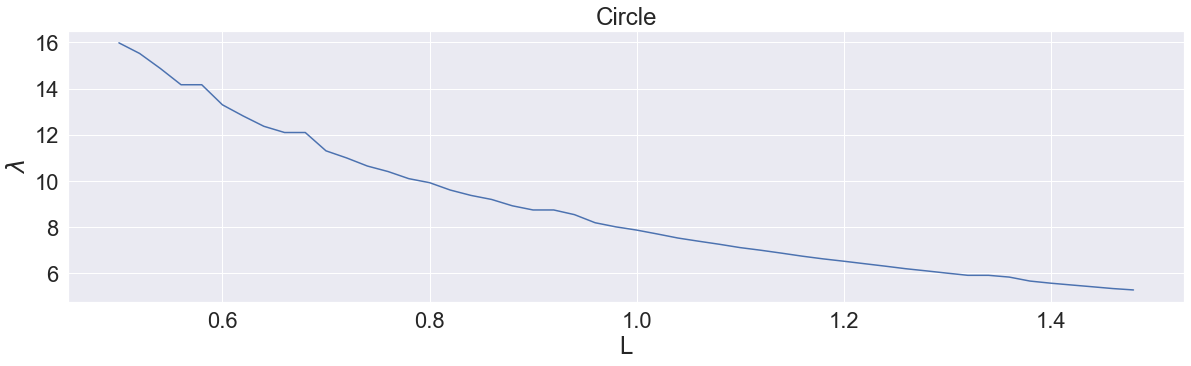

In [841]:
lamda_plot = [np.sqrt(wc[i][2]) / dx for i in range(len(wc))]
sns.lineplot(x=L, y=lamda_plot)
plt.xlabel('L')
plt.ylabel(r'$\lambda$')
plt.title('Circle')
sns.set(font_scale=2)
plt.show()

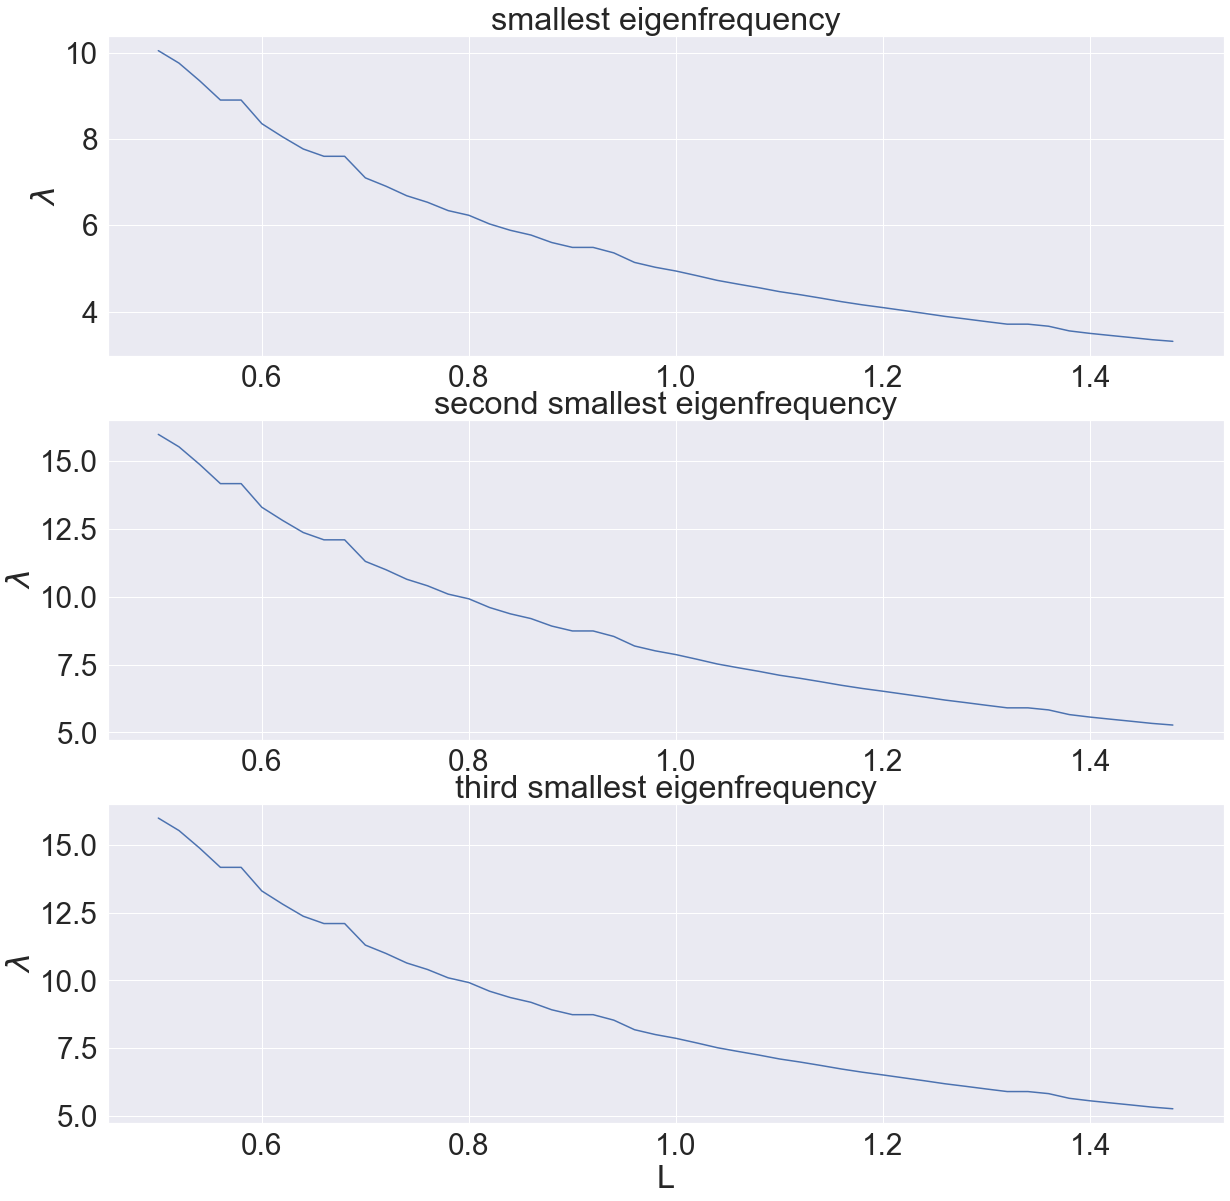

In [944]:
fig6, ax6 = plt.subplots(nrows=3)

plt.rcParams['figure.figsize'] = (20, 20)

sns.lineplot(x=L, y=[np.sqrt(wc_f[i][0]) / dx for i in range(len(wc_f))], ax=ax6[0])
ax6[0].set( ylabel=r'$\lambda$', title='smallest eigenfrequency')
sns.lineplot(x=L, y=[np.sqrt(wc_f[i][1]) / dx for i in range(len(wc_f))], ax=ax6[1])
ax6[1].set( ylabel=r'$\lambda$', title='second smallest eigenfrequency')
sns.lineplot(x=L, y=[np.sqrt(wc_f[i][2]) / dx for i in range(len(wc_f))], ax=ax6[2])
ax6[2].set(xlabel='L', ylabel=r'$\lambda$', title='third smallest eigenfrequency')

plt.show()

In [887]:
# Assume the L is 1
N = np.array(([50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160]))
N = N.astype(int)
print(N)

dx = 1 / N
print(dx)

wd = []

for i in range(len(N)):
    M = m_square(N[i])
    w, v = slin.eigs(M, k=5, which='SM')
    wd.append(w)
    print(i, end=',')

[ 50  60  70  80  90 100 110 120 130 140 150 160]
[0.02       0.01666667 0.01428571 0.0125     0.01111111 0.01
 0.00909091 0.00833333 0.00769231 0.00714286 0.00666667 0.00625   ]
0,1,2,3,4,5,6,7,8,9,10,11,

In [947]:
len(wd[0])

5

[(4.532777569728664+0j), (4.517652294569428+0j), (4.506883238352167+0j), (4.498825511294441+0j), (4.492569722542853+0j), (4.487572247061521+0j), (4.483488142686067+0j), (4.4800879851072875+0j), (4.477213248056945+0j), (4.47475088150826+0j), (4.472618096190587+0j), (4.47075287379265+0j)]


C:\Users\wangk\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


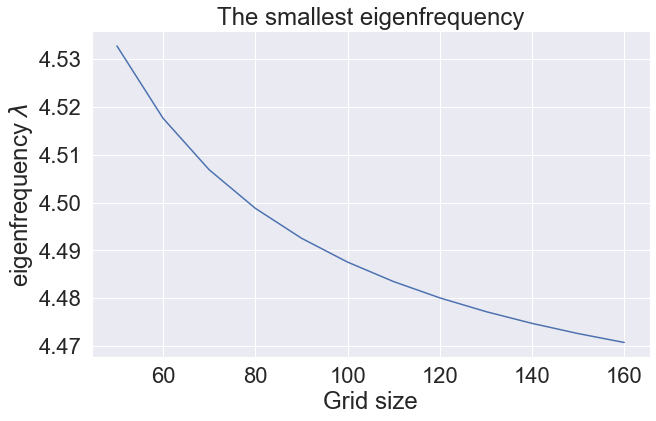

In [958]:
N = np.array(([50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160]))
N = N.astype(int)
dx = 1 / N

lamda_plot = [np.sqrt(wd[i][0])/dx[i] for i in range(len(wd))]
print(lamda_plot)

plt.rcParams['figure.figsize'] = (10, 6)

sns.lineplot(N, np.array(lamda_plot).real)
# plt.set(xlabel='Grid size', ylabel=r'eigenfrequency $\lambda$')
plt.xlabel('Grid size')
plt.ylabel(r'eigenfrequency $\lambda$')
plt.title('The smallest eigenfrequency')

sns.set(font_scale=2)

plt.show()

### E

In [336]:
def T(lamda, t, A=1, B=1):
    return A*np.cos(lamda*t) + B*np.sin(lamda*t)

In [363]:
def u(v, lamda, t):
    return v * T(lamda, t)

In [959]:
N = 50             
M = m_square(N)

ws_t, vs_t = slin.eigsh(M, k=4, which='SM')

In [972]:
N = 50             
M_rec = m_rectangle(N, N*2)

wr_t, vr_t = slin.eigsh(M_rec, k=4, which='SM')

In [962]:
M_c = m_square(N)
M_c = m_circle(M_c, N=N)
wc_t, vc_t = lin.eig(M_c)

In [1019]:
As = np.zeros((N,N))

v1 = np.reshape(vs_t[:,2], ((N-2, N-2)))
As[1:-1, 1:-1] = v1

# dx=0.02
lamdas_t = np.sqrt(ws_t[2]) / 0.02
lamdas_t

7.164004964549806

In [1066]:
Ar = np.zeros((N,N*2))

v1 = np.reshape(vr_t[:,2], ((N-2, N*2-2)))
Ar[1:-1, 1:-1] = v1

lamdar_t = np.sqrt(wr_t[2]) / 0.02
lamdar_t

5.737022170333336

In [1052]:
Ac = np.zeros((50,50))

w_order = set([i for i in wc_t if i > 0])
vm = vc_t[:, np.where(wc_t==sorted(w_order)[2])].real

v1 = np.reshape(vm, ((48, 48)))
Ac[1:-1, 1:-1] = v1

# dx=0.02
lamdac_t = np.sqrt(sorted(w_order)[2]) / 0.02
lamdac_t

(7.86860779374519+0j)

In [1020]:
# for the square shape
t = 10
As_t = u(As, lamdas_t, t)

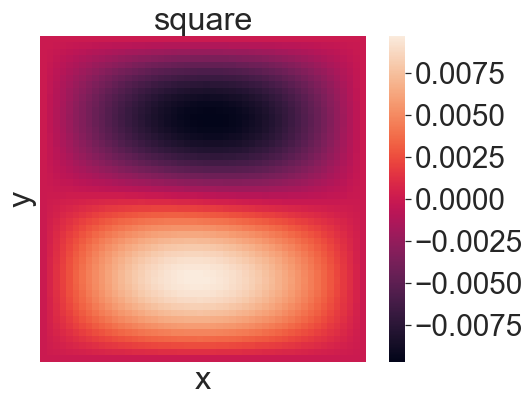

In [1021]:
plt.rcParams['figure.figsize'] = (8,6)

sns.heatmap(As_t, xticklabels=False, yticklabels=False, square=True)
plt.xlabel('x')
plt.ylabel('y')
plt.title('square')

sns.set(font_scale=1.7)

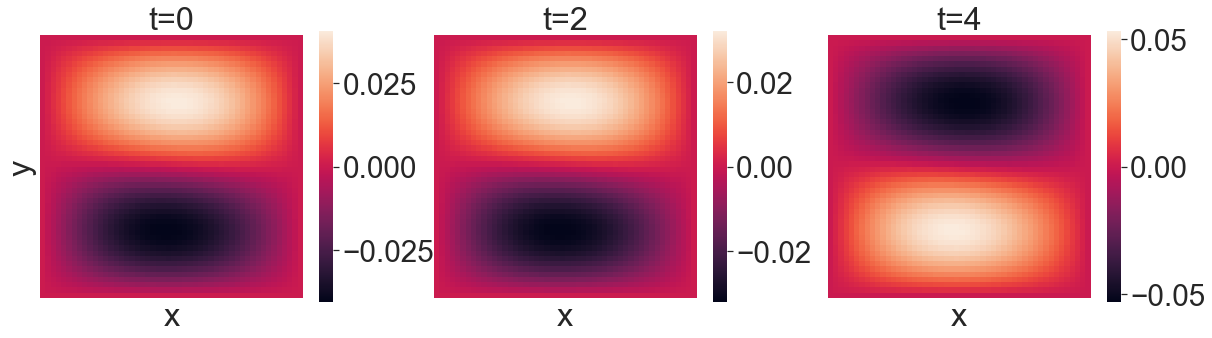

In [1068]:
figst, axst = plt.subplots(ncols=3)

plt.rcParams['figure.figsize'] = (20, 5)

As_t = u(As, lamdas_t, 0)
sns.heatmap(As_t, xticklabels=False, yticklabels=False, square=True, ax=axst[0])
axst[0].set(xlabel='x', ylabel='y', title='t=0' )
As_t = u(As, lamdas_t, 2)
sns.heatmap(As_t, xticklabels=False, yticklabels=False, square=True, ax=axst[1])
axst[1].set(xlabel='x', title='t=2')
As_t = u(As, lamdas_t, 4)
sns.heatmap(As_t, xticklabels=False, yticklabels=False, square=True, ax=axst[2])
axst[2].set(xlabel='x', title='t=4')

sns.set(font_scale=2.7)

plt.show()

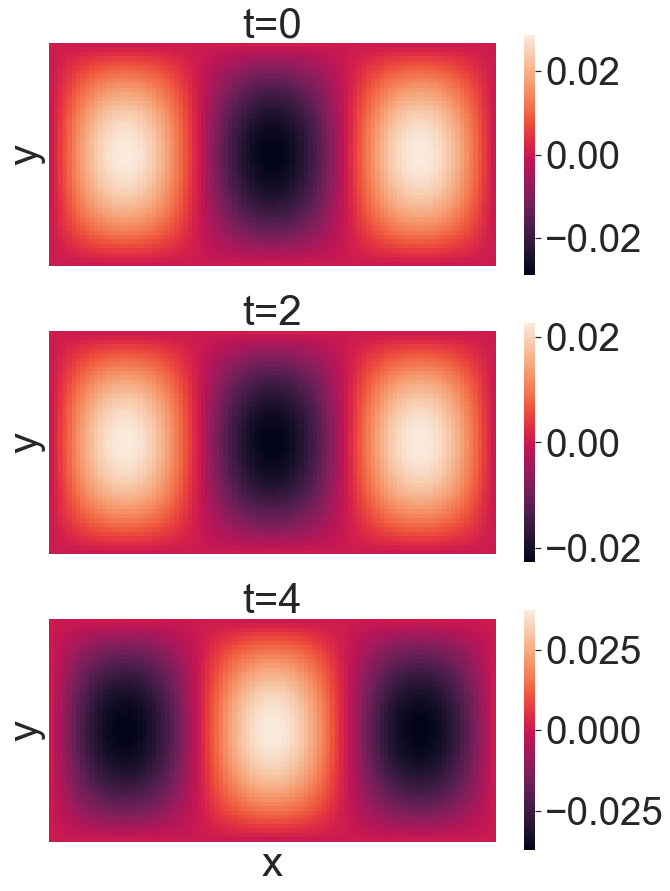

In [1070]:
figrt, axrt = plt.subplots(nrows=3)

plt.rcParams['figure.figsize'] = (10, 15)

Ar_t = u(Ar, lamdas_t, 0)
sns.heatmap(Ar_t, xticklabels=False, yticklabels=False, square=True, ax=axrt[0])
axrt[0].set(ylabel='y', title='t=0' )
Ar_t = u(Ar, lamdas_t, 2)
sns.heatmap(Ar_t, xticklabels=False, yticklabels=False, square=True, ax=axrt[1])
axrt[1].set(ylabel='y', title='t=2')
Ar_t = u(Ar, lamdas_t, 4)
sns.heatmap(Ar_t, xticklabels=False, yticklabels=False, square=True, ax=axrt[2])
axrt[2].set(xlabel='x', ylabel='y', title='t=4')

sns.set(font_scale=3.5)

plt.show()

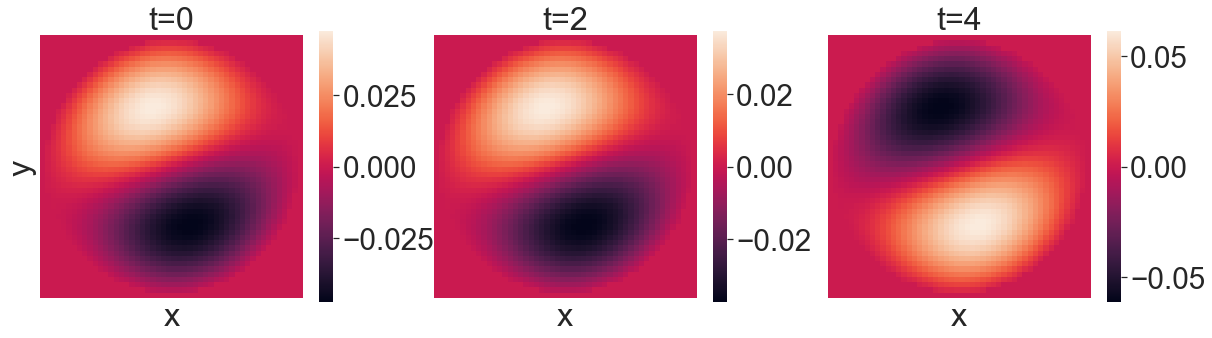

In [1053]:
figct, axct = plt.subplots(ncols=3)

plt.rcParams['figure.figsize'] = (20, 5)

Ac_t = u(Ac, lamdas_t, 0)
sns.heatmap(Ac_t, xticklabels=False, yticklabels=False, square=True, ax=axct[0])
axct[0].set(xlabel='x', ylabel='y', title='t=0' )
Ac_t = u(Ac, lamdas_t, 2)
sns.heatmap(Ac_t, xticklabels=False, yticklabels=False, square=True, ax=axct[1])
axct[1].set(xlabel='x', title='t=2')
Ac_t = u(Ac, lamdas_t, 4)
sns.heatmap(Ac_t, xticklabels=False, yticklabels=False, square=True, ax=axct[2])
axct[2].set(xlabel='x', title='t=4')

sns.set(font_scale=2.7)

plt.show()

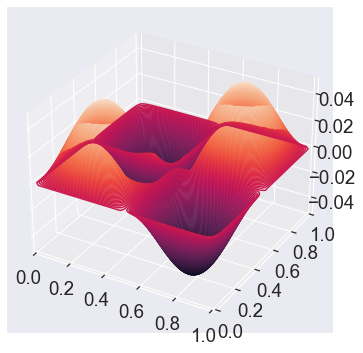

In [606]:
x = np.linspace(0, 1, 50)
y = np.linspace(0, 1, 50)
X, Y = np.meshgrid(x, y)

ax3 = plt.axes(projection='3d')

ax3.set_xlim3d([0, 1.0])
# ax3.set_xlabel('X')

ax3.set_ylim3d([0, 1.0])
# ax3.set_ylabel('Y')

ax3.set_zlim3d([-0.05, 0.05])
# ax3.set_zlabel('Z')

ax3.contour3D(X, Y, As_t, 200)

C:\Users\wangk\AppData\Local\Temp/ipykernel_14812/4211493454.py:9: UserWarning: No contour levels were found within the data range.
  ax3d.contour3D(X, Y, np.zeros((50, 50)), 100)


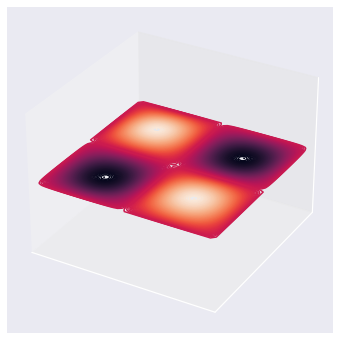

In [607]:
fig_ani = plt.figure()
ax3d = plt.axes(projection='3d')

x = np.linspace(0, 1, 50)
y = np.linspace(0, 1, 50)
X, Y = np.meshgrid(x, y)

def init():
    ax3d.contour3D(X, Y, np.zeros((50, 50)), 100)
    ax3d.set_xlim3d([0, 1.0])
    ax3d.set_xticks([])
    ax3d.set_ylim3d([0, 1.0])
    ax3d.set_yticks([])
    ax3d.set_zlim3d([-0.05, 0.05])
    ax3d.set_zticks([])

def animate(i):
    ax3d = plt.axes(projection='3d')

    ax3d.set_xlim3d([0, 1.0])
    ax3d.set_xticks([])
    ax3d.set_ylim3d([0, 1.0])
    ax3d.set_yticks([])
    ax3d.set_zlim3d([-0.05, 0.05])
    ax3d.set_zticks([])

    data = u(As, lamdas_t, i*0.01)
    ax3d.contour3D(X, Y, data, 200)

anim = animation.FuncAnimation(fig_ani, animate, init_func=init, frames=200, interval=1000)
anim.save('Square heatmap 3.mp4', fps=30)